In [4]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk

In [7]:
import json
import nltk
import random
import string
import pickle
import numpy as np
import pandas as pd
from io import BytesIO
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense


In [8]:
"""## **Download NLTK Package**"""
# Package sentence tokenizer
nltk.download('punkt') 
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\R-1FRDKM1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R-1FRDKM1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\R-1FRDKM1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
# Importing the dataset
with open('hexabot.json') as content:
  data1 = json.load(content)
# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata 
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])
# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [10]:
data

,patterns,tags
0,"Hexabot tuh apa, ya? Saya kurang paham sama is...",hexabot
1,"Bisa kasih tau gak, apa artinya Hexabot dalam ...",hexabot
2,Prosesor Hexabot itu sebenernya buat apa sih d...,hexabot
3,Gimana sih spesifikasi Hexabot itu? Apa beda s...,hexabot
4,Kalo Hexabot itu digunakan buat apa aja sih da...,hexabot
...,...,...
328,Bagaimana penilaianmu terhadap layanan rental ...,feedback
329,Apa yang bisa kamu ceritakan tentang pengalama...,feedback
330,Bagaimana kesanmu setelah menggunakan layanan ...,feedback
331,Bisakah kamu berbagi feedback tentang penyewaa...,feedback


In [11]:
data.head()

,patterns,tags
0,"Hexabot tuh apa, ya? Saya kurang paham sama is...",hexabot
1,"Bisa kasih tau gak, apa artinya Hexabot dalam ...",hexabot
2,Prosesor Hexabot itu sebenernya buat apa sih d...,hexabot
3,Gimana sih spesifikasi Hexabot itu? Apa beda s...,hexabot
4,Kalo Hexabot itu digunakan buat apa aja sih da...,hexabot


In [12]:
data.tail()

,patterns,tags
328,Bagaimana penilaianmu terhadap layanan rental ...,feedback
329,Apa yang bisa kamu ceritakan tentang pengalama...,feedback
330,Bagaimana kesanmu setelah menggunakan layanan ...,feedback
331,Bisakah kamu berbagi feedback tentang penyewaa...,feedback
332,Apakah kamu memiliki komentar atau saran untuk...,feedback


In [13]:


# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data


,patterns,tags
0,hexabot tuh apa ya saya kurang paham sama isti...,hexabot
1,bisa kasih tau gak apa artinya hexabot dalam b...,hexabot
2,prosesor hexabot itu sebenernya buat apa sih d...,hexabot
3,gimana sih spesifikasi hexabot itu apa beda sa...,hexabot
4,kalo hexabot itu digunakan buat apa aja sih da...,hexabot
...,...,...
328,bagaimana penilaianmu terhadap layanan rental ...,feedback
329,apa yang bisa kamu ceritakan tentang pengalama...,feedback
330,bagaimana kesanmu setelah menggunakan layanan ...,feedback
331,bisakah kamu berbagi feedback tentang penyewaa...,feedback


In [14]:
# Lematisasi
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
print (len(words), "unique lemmatized words", words)

485 unique lemmatized words [',', '.', 'ada', 'adakah', 'adalah', 'admin', 'agak', 'agar', 'ai', 'aja', 'akan', 'aku', 'akun', 'alamat', 'anda', 'anggota', 'apa', 'apa-apa', 'apakah', 'apasih', 'artinya', 'assistant', 'asuransi', 'atas', 'atau', 'aturan', 'available', 'bagaimana', 'bagus', 'bahasa', 'bahwa', 'baik', 'balik', 'balikin', 'balikmu', 'bantu', 'bantuan', 'bantuannya', 'banyak', 'barang-barang', 'barangkali', 'baru', 'batalin', 'batasan', 'bayar', 'bayarnya', 'beda', 'bedanya', 'begini', 'belakangan', 'belum', 'benar', 'beragam', 'berapa', 'berbagi', 'berbeda-beda', 'berdasarkan', 'beri', 'berikan', 'beritahu', 'berlaku', 'berpengalaman', 'bersyukur', 'berterima', 'besar', 'biar', 'biaya', 'bikin', 'bingung', 'bisa', 'bisakah', 'bonusnya', 'booking', 'boros', 'bot', 'buat', 'butuh', 'cancel', 'cara', 'caranya', 'cerdas', 'ceritakan', 'chatbot', 'coba', 'cocoknya', 'cukup', 'customer', 'daftar', 'dalam', 'dan', 'dana', 'dapat', 'dapatkah', 'dari', 'datang', 'daya', 'deal', 'd

In [15]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

14 classes ['additional_services', 'booking_confirmation', 'cancellation_policy', 'car_return', 'car_types', 'contact_information', 'feedback', 'greetings', 'hexabot', 'pricing_inquiry', 'rent_car_inquiry', 'rental_duration', 'special_offers', 'thank_you']


In [16]:
### **Mencari Jumlah Keseluruhan Data Teks**"""

# documents = combination between patterns and intents
print (len(documents), "documents")



8709 documents


In [17]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])

In [18]:
# Apply padding
x_train = pad_sequences(train)
# Encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])


In [19]:
print(x_train) # Padding Sequences

[[  0   0   0 ...  95 272  43]
 [  0   0   0 ...   3  62 275]
 [  0   0   0 ...  95   3 175]
 ...
 [  0   0   0 ...   1  35  41]
 [  0   0   0 ...   1  18  41]
 [  0   0   0 ... 160 108   1]]


In [20]:
print(y_train) #Label Encodings

[ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12  6  6  6  6  6  6  6  6

In [21]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

21


In [22]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  483
output length:  14


In [23]:
pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))

In [24]:
pickle.dump(le, open('labelencoder.pkl','wb'))
pickle.dump(tokenizer, open('tokenizer.pkl','wb'))

In [25]:
# Creating the model (Membuat Modeling)
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(12, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [32]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='/static/img/model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
model.summary() # Menampilkan Parameter Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 embedding (Embedding)       (None, 21, 10)            4840      
                                                                 
 lstm (LSTM)                 (None, 21, 12)            1104      
                                                                 
 flatten (Flatten)           (None, 252)               0         
                                                                 
 dense (Dense)               (None, 14)                3542      
                                                                 
Total params: 9486 (37.05 KB)
Trainable params: 9486 (37.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Training the model (Latih Model Data)
train = model.fit(x_train, y_train, epochs=400)

Epoch 1/400
11/11 [==============================] - 6s 10ms/step - loss: 2.6357 - accuracy: 0.0691
Epoch 2/400
11/11 [==============================] - 0s 10ms/step - loss: 2.6180 - accuracy: 0.1562
Epoch 3/400
11/11 [==============================] - 0s 18ms/step - loss: 2.5923 - accuracy: 0.1351
Epoch 4/400
11/11 [==============================] - 0s 17ms/step - loss: 2.5587 - accuracy: 0.1261
Epoch 5/400
11/11 [==============================] - 0s 14ms/step - loss: 2.5328 - accuracy: 0.1802
Epoch 6/400
11/11 [==============================] - 0s 11ms/step - loss: 2.4970 - accuracy: 0.2042
Epoch 7/400
11/11 [==============================] - 0s 14ms/step - loss: 2.4497 - accuracy: 0.2072
Epoch 8/400
11/11 [==============================] - 0s 15ms/step - loss: 2.3901 - accuracy: 0.2432
Epoch 9/400
11/11 [==============================] - 0s 18ms/step - loss: 2.3096 - accuracy: 0.2372
Epoch 10/400
11/11 [==============================] - 0s 15ms/step - loss: 2.2205 - accuracy: 0.2553

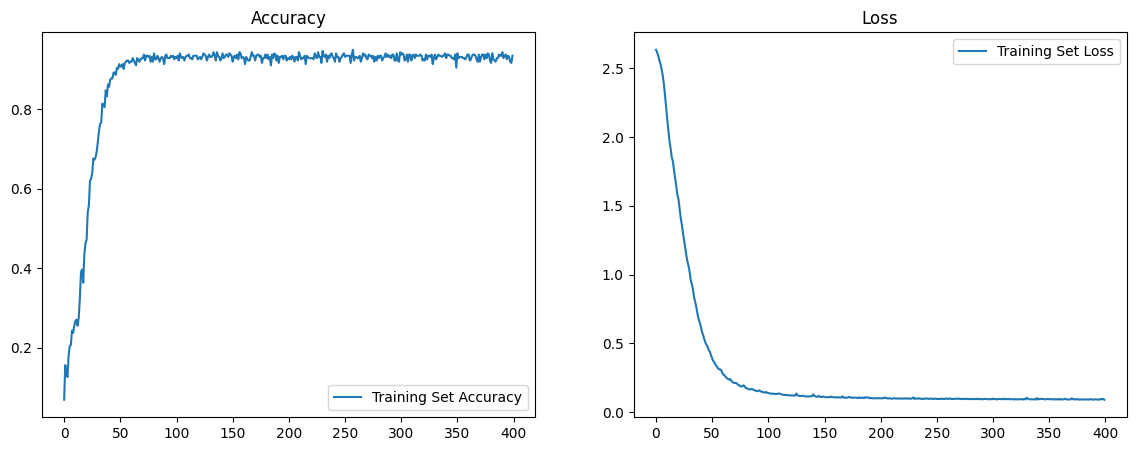

In [29]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [31]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👨‍🦰 Kamu : ')
  
  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag 
  response_tag = le.inverse_transform([output])[0]
  print("🤖 Hexabot : ", random.choice(responses[response_tag]))
  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break

1/1 [==============================] - 0s 37ms/step
🤖 Hexabot :  Halo, terima kasih telah menghubungi rental mobil Hexacore 👋🙂. Perkenalkan, Saya Hexabot yang akan membantu Anda dalam pelayanan pemesanan mobil di rental Hexacore. Ada yang dapat saya bantu?😁 
1/1 [==============================] - 0s 31ms/step
🤖 Hexabot :  Halo, terima kasih telah menghubungi rental mobil Hexacore 👋🙂. Perkenalkan, Saya Hexabot yang akan membantu Anda dalam pelayanan pemesanan mobil di rental Hexacore. Ada yang dapat saya bantu?😁 


KeyboardInterrupt: Interrupted by user

In [ ]:
model.save('chat_model.h5')

print('Model Created Successfully!')

Model Created Successfully!


c:\Users\R-1FRDKM1\anaconda1\envs\my-env\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
